In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as md

<h1> Importing Data

In [2]:
transactionDF = pd.read_excel("QVI_transaction_data.xlsx")
customerDF = pd.read_csv("QVI_purchase_behaviour.csv")

<h1> Data Cleaning

In [3]:
transactionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
transactionDF.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
# Converting Date column from integer to date format
transactionDF['DATE'] = pd.TimedeltaIndex(transactionDF['DATE'], unit='d') + dt.datetime(1899,12,30)
transactionDF.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transactionDF["PROD_NAME"].head(10)

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt & Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream&Chives 210G
Name: PROD_NAME, dtype: object

In [7]:
# There are any entries that are not chips
transactionDF["PROD_NAME"].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [8]:
# Removing special characters
transactionDF["PROD_NAME"] = transactionDF["PROD_NAME"].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip().tolist()
transactionDF["PROD_NAME"].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S Cream Onion 175g
4    Kettle Tortilla ChpsHny Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [9]:
transactionDF["PROD_NAME"].value_counts()

Kettle Mozzarella   Basil   Pesto 175g      3304
Kettle Tortilla ChpsHny Jlpno Chili 150g    3296
Cobs Popd Swt Chlli  Sr Cream Chips 110g    3269
Tyrrells Crisps     Ched   Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream      Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [10]:
# Removing any products that are Salsa
print(transactionDF.loc[transactionDF['PROD_NAME'].str.contains('alsa', na = False)].count())
transactionDF.loc[transactionDF['PROD_NAME'].str.contains('alsa', na = False), 'PROD_NAME'] = np.NaN 

DATE              18094
STORE_NBR         18094
LYLTY_CARD_NBR    18094
TXN_ID            18094
PROD_NBR          18094
PROD_NAME         18094
PROD_QTY          18094
TOT_SALES         18094
dtype: int64


In [11]:
# Double checking to see all cells containing salsa are replaced with NaN
transactionDF.loc[transactionDF['PROD_NAME'].str.contains('alsa', na = False)].count()
print(transactionDF.dropna(inplace=True)) # Removing all NaN values (including rows previously salsa products)

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

None


In [12]:
transactionDF.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
# Locating the transactions where 200 bags of chips were purchased
transactionDF.loc[transactionDF['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
# Locating all transactions by customer with the loyalty card number 226000
transactionDF.loc[transactionDF['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [15]:
# Dropping rows with the loyalty card number 226000
transactionDF.drop(transactionDF[transactionDF["LYLTY_CARD_NBR"] == 226000].index, inplace = True)

In [16]:
transactionDF.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [17]:
transactionDF["DATE"].value_counts() #Number of transactions for each day

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

In [18]:
transCountDF = transactionDF["DATE"].value_counts().rename_axis('DATE').reset_index(name='counts')
transCountDF

,DATE,counts
0,2018-12-24,865
1,2018-12-23,853
2,2018-12-22,840
3,2018-12-19,839
4,2018-12-20,808
...,...,...
359,2019-06-24,612
360,2018-10-18,611
361,2018-11-25,610
362,2018-09-22,609


In [19]:
year = pd.date_range(start='7/1/2018', end='6/30/2019')
TransactionDate = pd.DataFrame(year, columns=['DATE'])

In [20]:
transactionCountDF = pd.merge(TransactionDate, transCountDF, how = "outer") # Outer joining both dataframes to include the missing date
transactionCountDF['counts'] = transactionCountDF['counts'].fillna(0)

Text(0.5, 1.0, 'Transactions over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Transactions')

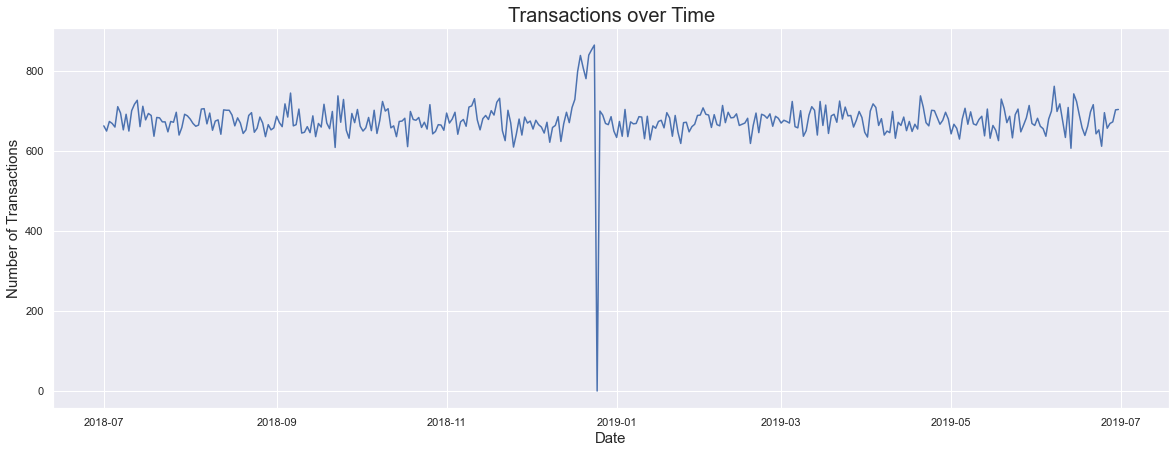

In [21]:
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.lineplot(data = transactionCountDF, x = "DATE", y = "counts")
ax.set_title("Transactions over Time", fontsize = 20)
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Number of Transactions", fontsize = 15)

In [22]:
mask = (transactionCountDF['DATE'] > "2018-12-1") & (transactionCountDF['DATE'] <= "2018-12-31")

In [23]:
decemberDF = transactionCountDF.loc[mask]

Text(0.5, 1.0, 'Transactions over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Transactions')

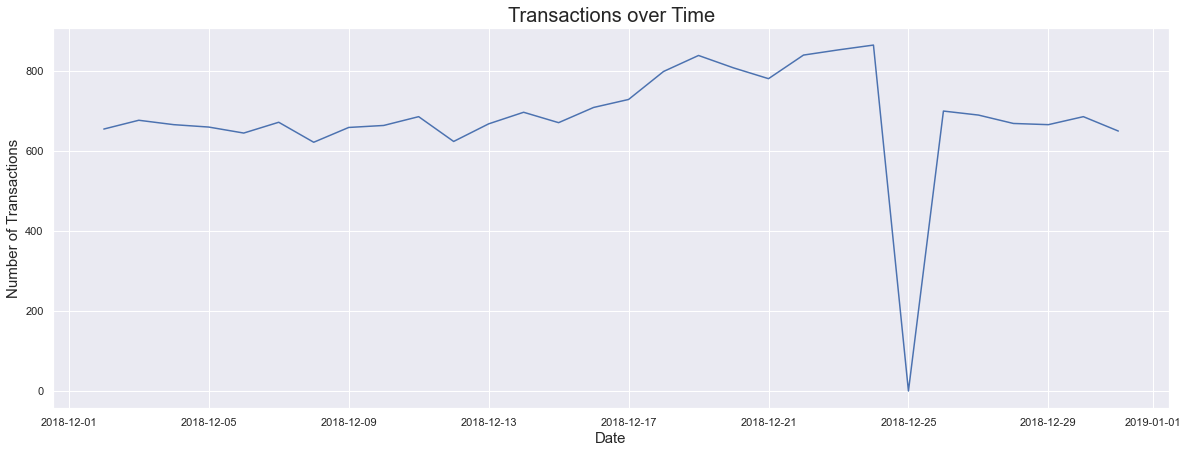

In [24]:
sns.set(rc={'figure.figsize':(20,7)})
december = sns.lineplot(data = decemberDF, x = "DATE", y = "counts")
december.set_title("Transactions over Time", fontsize = 20)
december.set_xlabel("Date", fontsize = 15)
december.set_ylabel("Number of Transactions", fontsize = 15)

In [25]:
transactionDF['PACK_SIZE'] = transactionDF['PROD_NAME'].str.extract('(\d+)')
transactionDF['PACK_SIZE'] = pd.to_numeric(transactionDF['PACK_SIZE'])

In [26]:
transactionDF.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


Text(0.5, 1.0, 'Number of Transactions by Pack Sizes')

Text(0.5, 0, 'grams')

Text(0, 0.5, 'count')

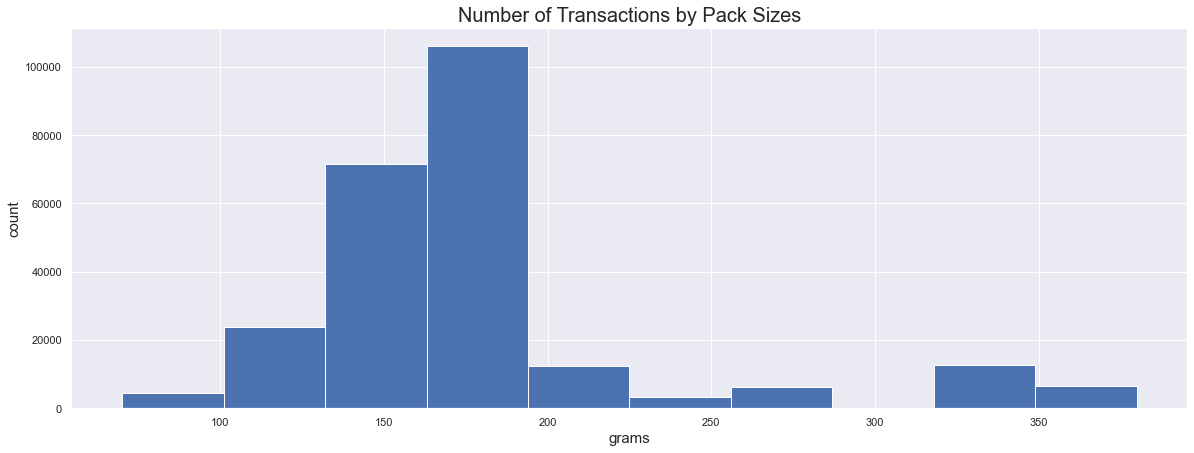

In [27]:
packHist = transactionDF["PACK_SIZE"].hist()
packHist.set_title("Number of Transactions by Pack Sizes", fontsize = 20)
packHist.set_xlabel("grams", fontsize = 15)
packHist.set_ylabel("count", fontsize = 15)

In [28]:
transactionDF['BRAND'] = transactionDF['PROD_NAME'].str.extract('(\\w+)')
transactionDF['BRAND'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [29]:
transactionDF.loc[transactionDF['BRAND'].str.contains('Red',na=False), 'BRAND'] = 'RRD'
transactionDF.loc[transactionDF['BRAND'].str.contains('orito',na=False), 'BRAND'] = 'Doritos'
transactionDF.loc[transactionDF['BRAND'].str.contains('fzns',na=False), 'BRAND'] = 'Infuzions'
transactionDF.loc[transactionDF['BRAND'].str.contains('Natural',na=False), 'BRAND'] = 'NCC'
transactionDF.loc[transactionDF['BRAND'].str.contains('Woolworths',na=False), 'BRAND'] = 'WW'
transactionDF.loc[transactionDF['BRAND'].str.contains('mith',na=False), 'BRAND'] = 'Smiths'
transactionDF.loc[transactionDF['BRAND'].str.contains('Snbts',na=False), 'BRAND'] = 'Sunbites'
transactionDF.loc[transactionDF['BRAND'].str.contains('GrnWves',na=False), 'BRAND'] = 'Grain'
transactionDF['BRAND'].value_counts()

Kettle       41288
Smiths       30353
Doritos      25224
Pringles     25102
RRD          16321
Infuzions    14201
Thins        14075
WW           11836
Cobs          9693
Tostitos      9471
Twisties      9454
Grain         7740
NCC           7469
Tyrrells      6442
Cheezels      4603
CCs           4551
Sunbites      3008
Cheetos       2927
Burger        1564
French        1418
Name: BRAND, dtype: int64

<h1> Customer Data Set

In [30]:
data = pd.merge(transactionDF, customerDF, how = 'left')

In [31]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [32]:
data.isnull().values.any()

False

In [33]:
# Saving the merged dataframe to a csv file for task 2
data.to_csv('Quantium_merged.csv')

In [34]:
sales = pd.DataFrame(data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            156863.75
Mainstream       YOUNG SINGLES/COUPLES     147582.20
                 RETIREES                  145168.95
Budget           YOUNG FAMILIES            129717.95
                 OLDER SINGLES/COUPLES     127833.60
Mainstream       OLDER SINGLES/COUPLES     124648.50
Premium          OLDER SINGLES/COUPLES     123537.55
Budget           RETIREES                  105916.30
Mainstream       OLDER FAMILIES             96413.55
Premium          RETIREES                   91296.65
Mainstream       YOUNG FAMILIES             86338.25
                 MIDAGE SINGLES/COUPLES     84734.25
Premium          YOUNG FAMILIES             78571.70
                 OLDER FAMILIES             75242.60
Budget           YOUNG SINGLES/COUPLES      57122.10
Premium          MIDAGE SINGLES/COUPLES     54443.85
                 YOUNG SINGLES/COUPLES      39052.30
Budget           MIDAGE SINGLES/COUPLES     33345.70
                 NEW FAMILIES               20607.45
Mainstream       NEW FAMILIES               15979.70
Premium          NEW FAMILIES               10760.80

<AxesSubplot:title={'center':'Total Sales by Customer Segment'}, xlabel='LIFESTAGE'>

Text(0, 0.5, 'Total Sales')

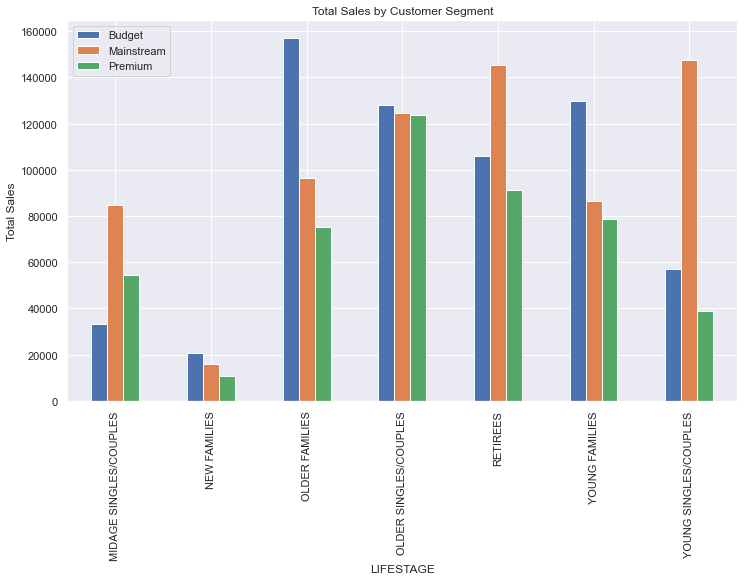

In [35]:
salesPLT = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPLT.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'])

In [36]:
avg_units = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()/data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


<AxesSubplot:title={'center':'Average Unit Sold by Customer Segment'}, xlabel='LIFESTAGE'>

Text(0, 0.5, 'Average Number of Units')

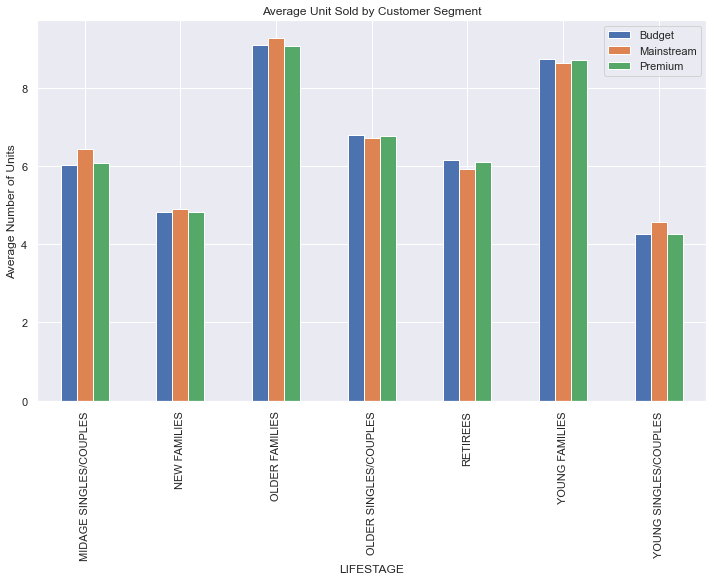

In [37]:
avgUnitsPLT = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum()/data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPLT.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit Sold by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'])

In [38]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE

avg_price = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum()/data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969

<AxesSubplot:title={'center':'Average Price by Customer Segment'}, xlabel='LIFESTAGE'>

Text(0, 0.5, 'Average Price')

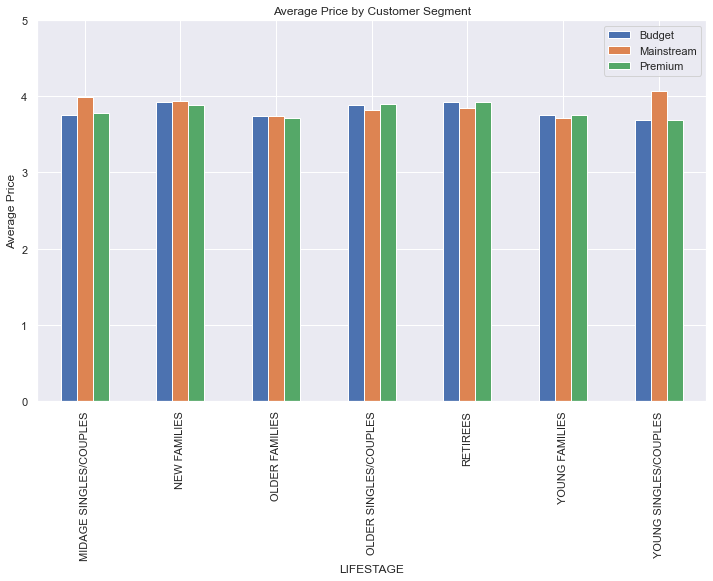

In [39]:
avgPricePLT = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum()/data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePLT.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 5))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'])

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples

In [42]:
unitPrice = data
unitPrice['PRICE'] = unitPrice['TOT_SALES'] / unitPrice['PROD_QTY']

# Viewing the new dataframe to make sure it is correct
unitPrice.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [45]:
# We must group the data so it separates mainstream and non-mainstream

main = unitPrice.loc[(unitPrice['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (unitPrice['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (unitPrice['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMain = unitPrice.loc[(unitPrice['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (unitPrice['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (unitPrice['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

<Figure size 720x360 with 0 Axes>

(array([1497.,  693., 3793., 2860., 7526., 4997., 3692., 2798., 2358.,
         425.]),
 array([1.7 , 2.18, 2.66, 3.14, 3.62, 4.1 , 4.58, 5.06, 5.54, 6.02, 6.5 ]),
 <BarContainer object of 10 artists>)

(array([1006., 2122., 2206., 5751., 6169., 3391., 2474., 1817., 1476.,
         316.]),
 array([1.35 , 1.865, 2.38 , 2.895, 3.41 , 3.925, 4.44 , 4.955, 5.47 ,
        5.985, 6.5  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Price per Unit')

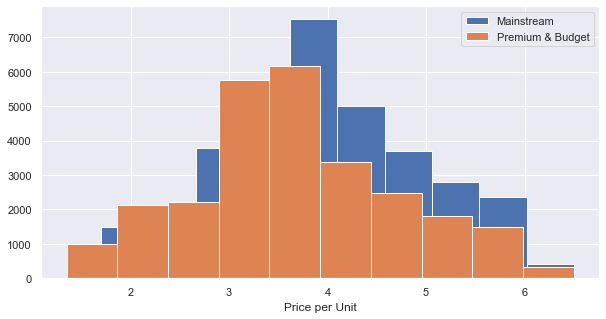

In [47]:
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(main, label = 'Mainstream')
plt.hist(nonMain, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')


In [59]:
mainAvgPrice = round(np.mean(main), 2)
nonMainAvgPrice = round(np.mean(nonMain), 2)
print("Mainstream avg price per unit: " + str(mainAvgPrice))
print("Non-mainstream avg price per unit: " + str(nonMainAvgPrice))

Mainstream avg price per unit: 4.04
Non-mainstream avg price per unit: 3.71


Mainstream customers have a higher average price per unit.

In [62]:
from scipy.stats import ttest_ind
ttest_ind(main, nonMain)

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

The t-test results in a p-value of 2.235645611549355e-309, i.e. the unit price for mainstream,
young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples.

We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.

In [63]:
target = data.loc[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = data.loc[(data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (data['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce 150g,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221347,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200,WW,YOUNG SINGLES/COUPLES,Mainstream,1.9
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


## Affinity Analysis

In [67]:
# Target Segment
tarBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
tarSum = tarBrand['PROD_QTY'].sum()
tarBrand['Target Brand Affinity'] = tarBrand['PROD_QTY'] / tarSum
tarBrand = pd.DataFrame(tarBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTarBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTarSum = nonTarBrand['PROD_QTY'].sum()
nonTarBrand['Non-Target Brand Affinity'] = nonTarBrand['PROD_QTY'] / nonTarSum
nonTarBrand = pd.DataFrame(nonTarBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())


# Merging the Target Segment and non-target segment
brand_proportions = pd.merge(tarBrand, nonTarBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002926,0.006538
CCs,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [68]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


We can see that for Mainstream - young singles/couples, they tend to buy Tyrrells chips as their choice of brand.

In [71]:
# Exploring Affinity for Pack Size
# Target Segment
tarPackSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
tarSum = tarPackSize['PROD_QTY'].sum()
tarPackSize['Target Pack Size Affinity'] = tarPackSize['PROD_QTY'] / tarSum
tarPackSize = pd.DataFrame(tarPackSize.groupby('PACK_SIZE')['Target Pack Size Affinity'].sum())

# Non-target segment
nonTarPackSize = nonTarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTarSum = nonTarPackSize['PROD_QTY'].sum()
nonTarPackSize['Non-Target Pack Size Affinity'] = nonTarPackSize['PROD_QTY'] / nonTarSum
nonTarPackSize = pd.DataFrame(nonTarPackSize.groupby('PACK_SIZE')['Non-Target Pack Size Affinity'].sum())


# Merging the Target Segment and non-target segment
Pack_proportions = pd.merge(tarPackSize, nonTarPackSize, left_index = True, right_index = True)
Pack_proportions.head()

,Target Pack Size Affinity,Non-Target Pack Size Affinity
PACK_SIZE,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089575
125,0.003009,0.005976
134,0.119420,0.101110


In [72]:
Pack_proportions['Affinity to Pack Size'] = Pack_proportions['Target Pack Size Affinity'] / Pack_proportions['Non-Target Pack Size Affinity']
Pack_proportions.sort_values(by = 'Affinity to Pack Size', ascending = False)

,Target Pack Size Affinity,Non-Target Pack Size Affinity,Affinity to Pack Size
PACK_SIZE,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090
210,0.029124,0.024891,1.170020
135,0.014769,0.012931,1.142086
250,0.014355,0.012863,1.115959
170,0.080773,0.080347,1.005300


We can see that for Mainstream - young singles/couples, they tend to buy 270g pack sizes of chips as their choice.

## Conclusion

The group with the most sales comes from the Budget Older Families group. The least amount of sales comes from
the Premimum New Families group. In the data, there are more customers found in the Mainstream Young Couples/Singles and Mainstream Retirees group. Mainstream young singles/couples tend to buy packs of chips that are 270g and also Tyrrells. Mainstream young couples/singles will pay more for their bags of chips in comparison to premium and budget customers.